## 获取数据

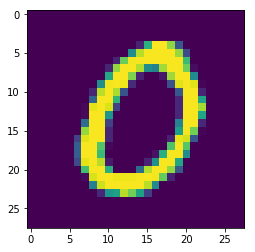

0.0


In [4]:
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
import numpy as np

data = fetch_mldata("MNIST original")

feats = data.data
labs = data.target

i = 300
image = np.reshape(feats[i],[28,28])
plt.imshow(image)
plt.show()
print(labs[i])

## 划分训练集和验证集

In [23]:
from sklearn.model_selection import train_test_split
train_feats, val_feats, train_labs, val_labs = train_test_split(feats, labs, test_size=0.2, random_state=0)

## 写.bin

In [37]:
import numpy as np
import matplotlib.pyplot as plt
val_feats = val_feats.astype(np.float32)
val_feats.tofile("data/feats.bin")
val_labs = val_labs.astype(np.int64)
val_labs.tofile("data/labs.bin")

## 读.bin

In [ ]:
val_feats = np.fromfile("data/feats.bin", dtype = np.float32)
val_labs = np.fromfile("data/labs.bin", dtype = np.int64)
n = len(val_labs)
val_feats = np.reshape(val_feats,[n,-1])
i = 10
plt.imshow(np.reshape(val_feats[i],[28,28]))
plt.show()
print(val_labs[i])

## 写TFTecord

In [6]:
import tensorflow as tf
option = tf.python_io.TFRecordOptions(tf.python_io.TFRecordCompressionType.GZIP)
writer = tf.python_io.TFRecordWriter("data/train.tfr", options=option)

n =len(train_feats)
train_feats = val_feats.astype(np.float32)
train_labs = val_labs.astype(np.int64)
for i in range(n):
    feature = {"feat": tf.train.Feature(bytes_list = tf.train.BytesList(value = [train_feats[i].tostring()])),
               "lab": tf.train.Feature(int64_list = tf.train.Int64List(value = [train_labs[i]]))}
    example = tf.train.Example(features=tf.train.Features(feature = feature))
    writer.write(example.SerializeToString())
writer.close()

## 读TFRecord

In [59]:
reader = tf.TFRecordReader(options=option)
file_queue = tf.train.string_input_producer(["data/train.tfr"])
_, example = reader.read(file_queue)
feature = {"lab": tf.FixedLenFeature([], tf.int64),
          "feat": tf.FixedLenFeature([], tf.string)}
features = tf.parse_single_example(example, features=feature)

feats = tf.decode_raw(features["feat"], tf.float32, name="feats")
labs = features["lab"]

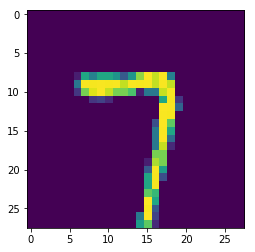

7


In [63]:
i = 10
with tf.Session() as sess:
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord) 
    for _ in range(i):
        feat, lab = sess.run([feats, labs])
    image = np.reshape(feat,[28,28])
    plt.imshow(image)
    plt.show()
    print(lab)
    coord.request_stop()
    coord.join(threads)
    